In [ ]:
!pip install tslearn

In [ ]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam

import numpy as np
from sklearn.metrics import accuracy_score
from tslearn.datasets import UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler, TimeSeriesScalerMinMax
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

import numpy as np
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGBC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,recall_score, confusion_matrix, precision_score, fbeta_score, f1_score, accuracy_score, classification_report
from matplotlib.gridspec import GridSpec
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [ ]:
import pandas as pd
all_sheets_dict = pd.read_excel("/content/drive/MyDrive/Scattering_data.xlsx", sheet_name=None,  header=None, index_col=None)
day1_df = all_sheets_dict['Day1']
day2_df = all_sheets_dict['Day2']
day3_df = all_sheets_dict['Day3']
day4_df = all_sheets_dict['Day4']
day5_df = all_sheets_dict['Day5']
day6_df = all_sheets_dict['Day6']
day7_df = all_sheets_dict['Day7']
day8_df = all_sheets_dict['Day8']
day9_df = all_sheets_dict['Day9']
day10_df = all_sheets_dict['Day10']

In [ ]:
days_2 = day1_df.append(day2_df, ignore_index=True)
days_3 = days_2.append(day3_df, ignore_index=True)

days_4 = days_3.append(day4_df, ignore_index=True)
days_5 = days_4.append(day5_df, ignore_index=True)

days_6 = days_5.append(day6_df, ignore_index=True)
days_7 = days_6.append(day7_df, ignore_index=True)

days_8 = days_7.append(day8_df, ignore_index=True)
days_9 = days_8.append(day9_df, ignore_index=True)

days_10 = days_9.append(day10_df, ignore_index=True)


<ipython-input-5-0bf0b8abddd6>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_2 = day1_df.append(day2_df, ignore_index=True)
<ipython-input-5-0bf0b8abddd6>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_3 = days_2.append(day3_df, ignore_index=True)
<ipython-input-5-0bf0b8abddd6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_4 = days_3.append(day4_df, ignore_index=True)
<ipython-input-5-0bf0b8abddd6>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_5 = days_4.append(day5_df, ignore_index=True)
<ipython-input-5-0bf0b8abddd6>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [ ]:
days_10.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            503, 504, 505, 506, 507, 508, 509, 510, 511, 512],
           dtype='int64', length=513)

In [ ]:
x= days_10.iloc[:,:-1].copy()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

#class_labels = ['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']
#label_encoder = LabelEncoder()
#label_encoder.fit(class_labels)

# Convert class labels to numeric levels using transform method of LabelEncoder
#labels = label_encoder.transform(data_4days['Class'].values) #change

y = days_10.iloc[:,-1:].values


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)
x = pd.DataFrame(x)
x.columns = days_10.iloc[:,:-1].columns.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16800, 512), (16800, 1), (7200, 512), (7200, 1))

In [ ]:
#normalize the data
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

In [ ]:
# Convert the data to torch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

In [ ]:
print("Unique values in y_train:", torch.unique(y_train))
print("Unique values in y_test:", torch.unique(y_test))

#start class from 0
#y_train = y_train - 1
#y_test = y_test - 1




Unique values in y_train: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Unique values in y_test: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [ ]:
#Datasets
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
#Dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
print("Unique values in y_train:", torch.unique(y_train))
print("Unique values in y_test:", torch.unique(y_test))

Unique values in y_train: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Unique values in y_test: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(device)

cuda:0


In [ ]:
# model 1: CNN + LSTM
# model 2: LSTM + CNN
# model 3: CNN LSTM parallel

class CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(CNN_LSTM, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        #cnn takes input of shape (batch_size, channels, seq_len)
        x = x.permute(0, 2, 1)
        out = self.cnn(x)
        # lstm takes input of shape (batch_size, seq_len, input_size)
        out = out.permute(0, 2, 1)
        out, _ = self.lstm(out)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
class LSTM_CNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_CNN, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=hidden_size, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            #flatten
            nn.Flatten(),
            nn.LazyLinear(out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=num_classes)
        )

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out.permute(0, 2, 1)
        out = self.cnn(out)
        return out

In [ ]:
# model 3: CNN LSTM parallel
class ParallelCNNLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(ParallelCNNLSTMModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(out_features=128),
            nn.ReLU()
        )
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc_lstm = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128*2, num_classes)

    def forward(self, x):
        #cnn takes input of shape (batch_size, channels, seq_len)
        x_cnn = x.permute(0, 2, 1)
        out_cnn = self.cnn(x_cnn)
        # lstm takes input of shape (batch_size, seq_len, input_size)
        out_lstm, _ = self.lstm(x)
        out_lstm = self.fc_lstm(out_lstm[:, -1, :])
        out = torch.cat([out_cnn, out_lstm], dim=1)
        out = self.fc(out)
        return out

In [ ]:
input_size = X_train.shape[-1]
hidden_size = 128
num_layers = 2
num_classes = len(np.unique(y_train))

cnn_lstm = CNN_LSTM(input_size, hidden_size, num_layers, num_classes).to(device)
lstm_cnn = LSTM_CNN(input_size, hidden_size, num_layers, num_classes).to(device)
cnn_lstm_parallel = ParallelCNNLSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Streaming output truncated to the last 5000 lines.
Epoch [58/250], Step [200/263], Loss: 0.3502, Accuracy: 85.62%
Epoch [58/250], Step [210/263], Loss: 0.3156, Accuracy: 85.78%
Epoch [58/250], Step [220/263], Loss: 0.3018, Accuracy: 86.56%
Epoch [58/250], Step [230/263], Loss: 0.2766, Accuracy: 89.06%
Epoch [58/250], Step [240/263], Loss: 0.3040, Accuracy: 88.12%
Epoch [58/250], Step [250/263], Loss: 0.3032, Accuracy: 88.28%
Epoch [58/250], Step [260/263], Loss: 0.3069, Accuracy: 87.66%
Epoch [59/250], Step [10/263], Loss: 0.2656, Accuracy: 89.84%
Epoch [59/250], Step [20/263], Loss: 0.3049, Accuracy: 87.81%
Epoch [59/250], Step [30/263], Loss: 0.2695, Accuracy: 89.22%
Epoch [59/250], Step [40/263], Loss: 0.2786, Accuracy: 87.66%
Epoch [59/250], Step [50/263], Loss: 0.2887, Accuracy: 88.28%
Epoch [59/250], Step [60/263], Loss: 0.3039, Accuracy: 87.81%
Epoch [59/250], Step [70/263], Loss: 0.3123, Accuracy: 86.88%
Epoch [59/250], Step [80/263], Loss: 0.3045, Accuracy: 87.50%
Epoch [59/25

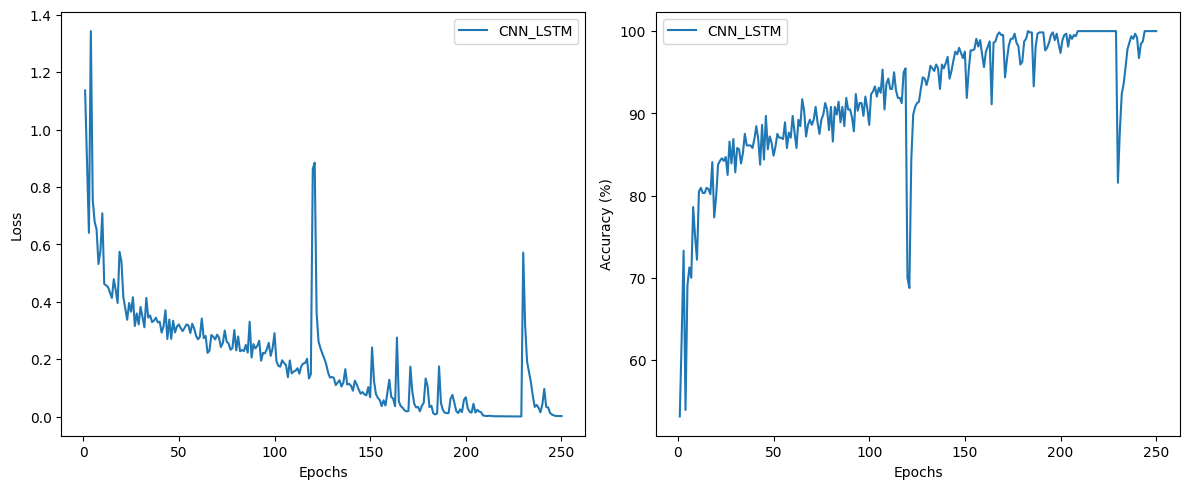

In [ ]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

def train(models: List, train_loader: DataLoader, epochs: int):
    criterion = nn.CrossEntropyLoss()
    loss_history = {model.__class__.__name__: [] for model in models}
    accuracy_history = {model.__class__.__name__: [] for model in models}

    for model in models:
        print("Training model: ", model.__class__.__name__)
        model.train()
        optimizer = Adam(model.parameters(), lr=0.001)
        for epoch in range(epochs):
            total_loss = 0.0
            correct_predictions = 0
            total_samples = 0

            for i, (x, y) in enumerate(train_loader):
                x = x.to(device)
                y = y.squeeze().to(device)  # Remove the extra dimension from the target tensor
                optimizer.zero_grad()
                y_pred = model(x)
                loss = criterion(y_pred, y)
                loss.backward()
                optimizer.step()

                # Compute accuracy
                _, predicted_labels = torch.max(y_pred, 1)
                correct_predictions += (predicted_labels == y).sum().item()
                total_samples += y.size(0)

                total_loss += loss.item()
                if (i + 1) % 10 == 0:
                    avg_loss = total_loss / 10
                    accuracy = correct_predictions / total_samples * 100
                    print(f'Epoch [{epoch + 1}/{epochs}], Step [{i + 1}/{len(train_loader)}], '
                          f'Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
                    total_loss = 0.0
                    correct_predictions = 0
                    total_samples = 0

            # Store loss and accuracy values for plotting
            loss_history[model.__class__.__name__].append(avg_loss)
            accuracy_history[model.__class__.__name__].append(accuracy)

        print("Training completed for model: ", model.__class__.__name__)

    # Plot loss and accuracy for each model
    plt.figure(figsize=(12, 5))
    for model in models:
        plt.subplot(1, 2, 1)  # Loss plot
        plt.plot(range(1, epochs + 1), loss_history[model.__class__.__name__], label=model.__class__.__name__)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)  # Accuracy plot
        plt.plot(range(1, epochs + 1), accuracy_history[model.__class__.__name__], label=model.__class__.__name__)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.legend()

    plt.tight_layout()
    plt.show()

# train
models = [cnn_lstm]#, cnn_lstm_parallel]
num_epochs = 250
train(models, train_loader, epochs=num_epochs)


Streaming output truncated to the last 5000 lines.
Epoch [58/250], Step [200/263], Loss: 0.0492, Accuracy: 97.97%
Epoch [58/250], Step [210/263], Loss: 0.0348, Accuracy: 98.75%
Epoch [58/250], Step [220/263], Loss: 0.0553, Accuracy: 98.28%
Epoch [58/250], Step [230/263], Loss: 0.0438, Accuracy: 98.12%
Epoch [58/250], Step [240/263], Loss: 0.0528, Accuracy: 98.28%
Epoch [58/250], Step [250/263], Loss: 0.0449, Accuracy: 98.28%
Epoch [58/250], Step [260/263], Loss: 0.0299, Accuracy: 99.06%
Epoch [59/250], Step [10/263], Loss: 0.0325, Accuracy: 99.22%
Epoch [59/250], Step [20/263], Loss: 0.0350, Accuracy: 99.53%
Epoch [59/250], Step [30/263], Loss: 0.0341, Accuracy: 99.06%
Epoch [59/250], Step [40/263], Loss: 0.0323, Accuracy: 98.59%
Epoch [59/250], Step [50/263], Loss: 0.0243, Accuracy: 99.38%
Epoch [59/250], Step [60/263], Loss: 0.0325, Accuracy: 99.06%
Epoch [59/250], Step [70/263], Loss: 0.0396, Accuracy: 98.44%
Epoch [59/250], Step [80/263], Loss: 0.0341, Accuracy: 99.06%
Epoch [59/25

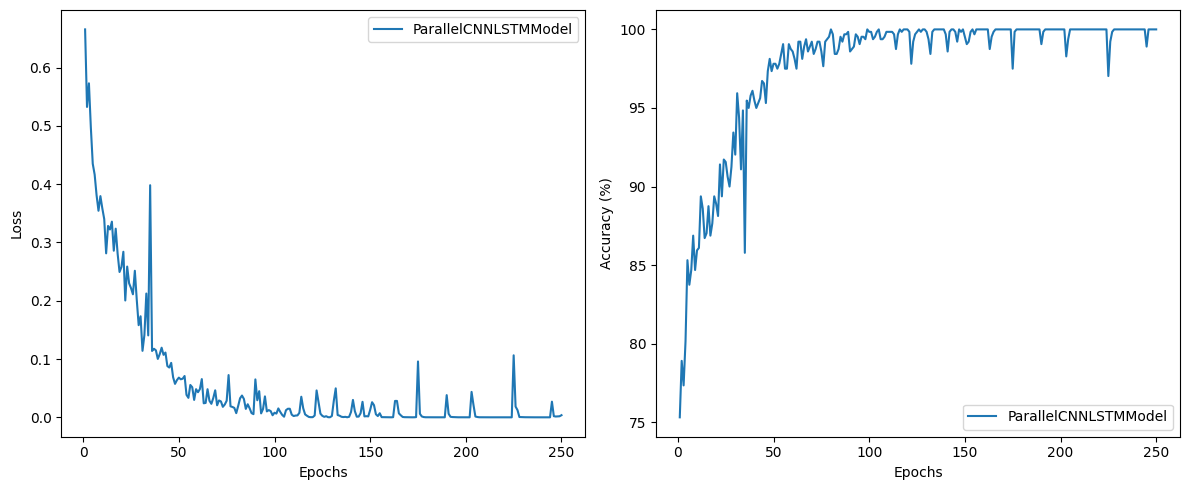

In [ ]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

def train(models: List, train_loader: DataLoader, epochs: int):
    criterion = nn.CrossEntropyLoss()
    loss_history = {model.__class__.__name__: [] for model in models}
    accuracy_history = {model.__class__.__name__: [] for model in models}

    for model in models:
        print("Training model: ", model.__class__.__name__)
        model.train()
        optimizer = Adam(model.parameters(), lr=0.001)
        for epoch in range(epochs):
            total_loss = 0.0
            correct_predictions = 0
            total_samples = 0

            for i, (x, y) in enumerate(train_loader):
                x = x.to(device)
                y = y.squeeze().to(device)  # Remove the extra dimension from the target tensor
                optimizer.zero_grad()
                y_pred = model(x)
                loss = criterion(y_pred, y)
                loss.backward()
                optimizer.step()

                # Compute accuracy
                _, predicted_labels = torch.max(y_pred, 1)
                correct_predictions += (predicted_labels == y).sum().item()
                total_samples += y.size(0)

                total_loss += loss.item()
                if (i + 1) % 10 == 0:
                    avg_loss = total_loss / 10
                    accuracy = correct_predictions / total_samples * 100
                    print(f'Epoch [{epoch + 1}/{epochs}], Step [{i + 1}/{len(train_loader)}], '
                          f'Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
                    total_loss = 0.0
                    correct_predictions = 0
                    total_samples = 0

            # Store loss and accuracy values for plotting
            loss_history[model.__class__.__name__].append(avg_loss)
            accuracy_history[model.__class__.__name__].append(accuracy)

        print("Training completed for model: ", model.__class__.__name__)

    # Plot loss and accuracy for each model
    plt.figure(figsize=(12, 5))
    for model in models:
        plt.subplot(1, 2, 1)  # Loss plot
        plt.plot(range(1, epochs + 1), loss_history[model.__class__.__name__], label=model.__class__.__name__)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)  # Accuracy plot
        plt.plot(range(1, epochs + 1), accuracy_history[model.__class__.__name__], label=model.__class__.__name__)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.legend()

    plt.tight_layout()
    plt.show()

# train
models = [cnn_lstm_parallel]
num_epochs = 250
train(models, train_loader, epochs=num_epochs)


In [ ]:
models = [cnn_lstm, cnn_lstm_parallel]

In [ ]:
def test(models: List, test_loader: DataLoader):
    accuracy_history = {model.__class__.__name__: [] for model in models}

    for model in models:
        print("Testing model: ", model.__class__.__name__)
        model.eval()  # Set the model to evaluation mode
        correct_predictions = 0
        total_samples = 0

        with torch.no_grad():  # Disable gradient computation during inference
            for x, y in test_loader:
                x = x.to(device)
                y = y.squeeze().to(device)  # Remove the extra dimension from the target tensor
                y_pred = model(x)
                _, predicted_labels = torch.max(y_pred, 1)
                correct_predictions += (predicted_labels == y).sum().item()
                total_samples += y.size(0)

        accuracy = correct_predictions / total_samples * 100
        print("Test Accuracy: {:.2f}%".format(accuracy))
        accuracy_history[model.__class__.__name__].append(accuracy)

    # Plot accuracy for each model
    plt.figure(figsize=(8, 4))
    models_names = [model.__class__.__name__ for model in models]
    x_points = np.arange(len(models_names))
    plt.bar(x_points, [accuracy_history[model_name][0] for model_name in models_names])
    plt.xlabel('Model')
    plt.ylabel('Accuracy (%)')
    plt.xticks(x_points, models_names)
    plt.show()

# Test the models
test(models, test_loader)



In [ ]:
import pickle
model_filename = 'cnn_lstm.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(cnn_lstm, file)

import pickle
model_filename = 'cnn_lstm_parallel.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(cnn_lstm_parallel, file)

CNN-LSTM on scattering coefficient

In [ ]:
import os
import ast
import warnings
import pandas as pd
import numpy as np

# Suppress all warnings
warnings.filterwarnings("ignore")



# Replace 'path_to_directory' with the path of the directory containing the files
directory = '/content/drive/MyDrive/Day10/Day10_csv'

# List all files in the directory
file_list = os.listdir(directory)


# Iterate over the files and do something with each file
for count_, file_name in enumerate(file_list):
    #print(count_)
    # If you want to work with the full file path, use os.path.join()
    file_path = os.path.join(directory, file_name)

    # Perform some action with the file
    print(f"Processing file: {file_name}")
    csvfile =directory + "/" + file_name
    class_ = pd.read_csv(csvfile)
    array_= str(class_.order2.values).replace("\\n      ","").split("]), array([")
    order2 = []

    class_name = str(file_name).split("_")[1]
    for i in array_:
      order_ = i.replace("['[array([","").replace("])]']","")
      order2_ = str(order_).split(", ")
      for coef in order2_:
        coef = coef.replace(" ","")
        order2.append(float(coef))

    order2.append(class_name)
    numpy_array = np.array(order2)
    if count_ == 0:
      day1_df = pd.DataFrame([numpy_array])
    else:
      day1_df = day1_df.append(pd.DataFrame([numpy_array]), ignore_index=True)

Processing file: class_1_1400.csv
Processing file: class_0_1401.csv
Processing file: class_9_1402.csv
Processing file: class_9_1403.csv
Processing file: class_8_1404.csv
Processing file: class_1_1405.csv
Processing file: class_3_1406.csv
Processing file: class_3_1407.csv
Processing file: class_6_1408.csv
Processing file: class_1_1409.csv
Processing file: class_9_1410.csv
Processing file: class_1_1411.csv
Processing file: class_6_1412.csv
Processing file: class_0_1413.csv
Processing file: class_3_1414.csv
Processing file: class_1_1415.csv
Processing file: class_7_1416.csv
Processing file: class_1_1417.csv
Processing file: class_8_1418.csv
Processing file: class_9_1419.csv
Processing file: class_6_1420.csv
Processing file: class_5_1421.csv
Processing file: class_9_1422.csv
Processing file: class_4_1423.csv
Processing file: class_7_1424.csv
Processing file: class_8_1425.csv
Processing file: class_9_1426.csv
Processing file: class_11_1427.csv
Processing file: class_0_1428.csv
Processing fi

In [ ]:
day1_df.to_csv("/content/drive/MyDrive/scattering_coeff_day10.csv")

In [ ]:
days_10_scatter = pd.read_csv("/content/drive/MyDrive/scattering_coeff_day10.csv")

In [ ]:
x= days_10_scatter.iloc[:,:-1].copy()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

#class_labels = ['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']
#label_encoder = LabelEncoder()
#label_encoder.fit(class_labels)

# Convert class labels to numeric levels using transform method of LabelEncoder
#labels = label_encoder.transform(data_4days['Class'].values) #change

y = days_10_scatter.iloc[:,-1:].values


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)
x = pd.DataFrame(x)
x.columns = days_10_scatter.iloc[:,:-1].columns.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1680, 1265), (1680, 1), (720, 1265), (720, 1))

In [ ]:
#normalize the data
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

In [ ]:
# Convert the data to torch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

In [ ]:
print("Unique values in y_train:", torch.unique(y_train))
print("Unique values in y_test:", torch.unique(y_test))

#start class from 0
#y_train = y_train - 1
#y_test = y_test - 1




Unique values in y_train: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Unique values in y_test: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [ ]:
#Datasets
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
#Dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
print("Unique values in y_train:", torch.unique(y_train))
print("Unique values in y_test:", torch.unique(y_test))

Unique values in y_train: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Unique values in y_test: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(device)

cuda:0


In [ ]:
# model 1: CNN + LSTM
# model 2: LSTM + CNN
# model 3: CNN LSTM parallel

class CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(CNN_LSTM, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        #cnn takes input of shape (batch_size, channels, seq_len)
        x = x.permute(0, 2, 1)
        out = self.cnn(x)
        # lstm takes input of shape (batch_size, seq_len, input_size)
        out = out.permute(0, 2, 1)
        out, _ = self.lstm(out)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
class LSTM_CNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_CNN, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=hidden_size, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            #flatten
            nn.Flatten(),
            nn.LazyLinear(out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=num_classes)
        )

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out.permute(0, 2, 1)
        out = self.cnn(out)
        return out

In [ ]:
# model 3: CNN LSTM parallel
class ParallelCNNLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(ParallelCNNLSTMModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(out_features=128),
            nn.ReLU()
        )
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc_lstm = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128*2, num_classes)

    def forward(self, x):
        #cnn takes input of shape (batch_size, channels, seq_len)
        x_cnn = x.permute(0, 2, 1)
        out_cnn = self.cnn(x_cnn)
        # lstm takes input of shape (batch_size, seq_len, input_size)
        out_lstm, _ = self.lstm(x)
        out_lstm = self.fc_lstm(out_lstm[:, -1, :])
        out = torch.cat([out_cnn, out_lstm], dim=1)
        out = self.fc(out)
        return out

In [ ]:
input_size = X_train.shape[-1]
hidden_size = 128
num_layers = 2
num_classes = len(np.unique(y_train))

cnn_lstm = CNN_LSTM(input_size, hidden_size, num_layers, num_classes).to(device)
lstm_cnn = LSTM_CNN(input_size, hidden_size, num_layers, num_classes).to(device)
cnn_lstm_parallel = ParallelCNNLSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)

Training model:  CNN_LSTM
Epoch [1/150], Step [10/27], Loss: 0.0410, Accuracy: 98.91%
Epoch [1/150], Step [20/27], Loss: 0.1254, Accuracy: 95.78%
Epoch [2/150], Step [10/27], Loss: 0.1363, Accuracy: 96.72%
Epoch [2/150], Step [20/27], Loss: 0.0721, Accuracy: 97.03%
Epoch [3/150], Step [10/27], Loss: 0.0702, Accuracy: 97.34%
Epoch [3/150], Step [20/27], Loss: 0.0837, Accuracy: 97.50%
Epoch [4/150], Step [10/27], Loss: 0.0531, Accuracy: 98.28%
Epoch [4/150], Step [20/27], Loss: 0.0315, Accuracy: 99.06%
Epoch [5/150], Step [10/27], Loss: 0.0190, Accuracy: 99.38%
Epoch [5/150], Step [20/27], Loss: 0.0192, Accuracy: 99.84%
Epoch [6/150], Step [10/27], Loss: 0.0125, Accuracy: 99.69%
Epoch [6/150], Step [20/27], Loss: 0.0103, Accuracy: 100.00%
Epoch [7/150], Step [10/27], Loss: 0.0053, Accuracy: 100.00%
Epoch [7/150], Step [20/27], Loss: 0.0053, Accuracy: 100.00%
Epoch [8/150], Step [10/27], Loss: 0.0032, Accuracy: 100.00%
Epoch [8/150], Step [20/27], Loss: 0.0038, Accuracy: 100.00%
Epoch [9/

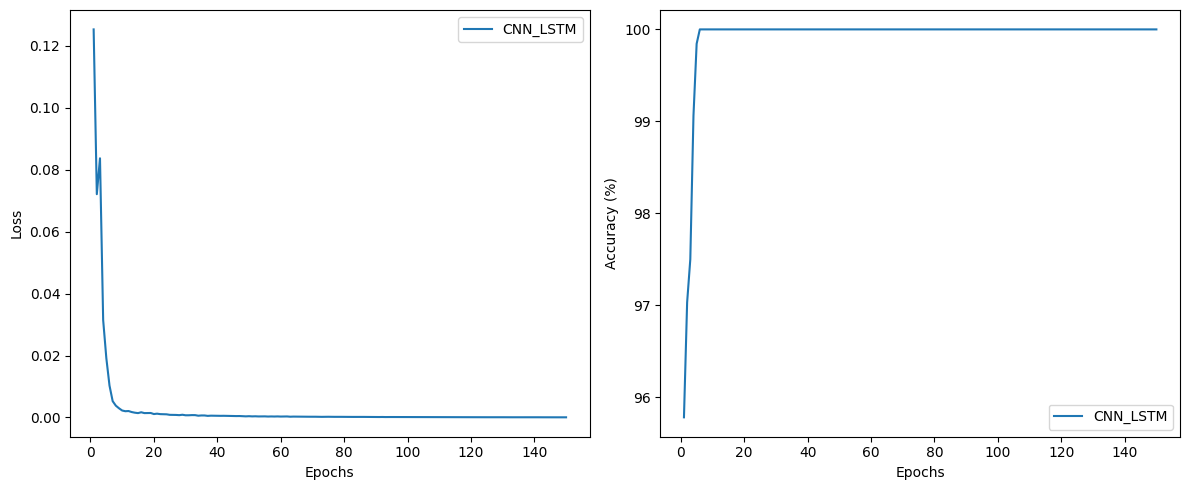

In [ ]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

def train(models: List, train_loader: DataLoader, epochs: int):
    criterion = nn.CrossEntropyLoss()
    loss_history = {model.__class__.__name__: [] for model in models}
    accuracy_history = {model.__class__.__name__: [] for model in models}

    for model in models:
        print("Training model: ", model.__class__.__name__)
        model.train()
        optimizer = Adam(model.parameters(), lr=0.001)
        for epoch in range(epochs):
            total_loss = 0.0
            correct_predictions = 0
            total_samples = 0

            for i, (x, y) in enumerate(train_loader):
                x = x.to(device)
                y = y.squeeze().to(device)  # Remove the extra dimension from the target tensor
                optimizer.zero_grad()
                y_pred = model(x)
                loss = criterion(y_pred, y)
                loss.backward()
                optimizer.step()

                # Compute accuracy
                _, predicted_labels = torch.max(y_pred, 1)
                correct_predictions += (predicted_labels == y).sum().item()
                total_samples += y.size(0)

                total_loss += loss.item()
                if (i + 1) % 10 == 0:
                    avg_loss = total_loss / 10
                    accuracy = correct_predictions / total_samples * 100
                    print(f'Epoch [{epoch + 1}/{epochs}], Step [{i + 1}/{len(train_loader)}], '
                          f'Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
                    total_loss = 0.0
                    correct_predictions = 0
                    total_samples = 0

            # Store loss and accuracy values for plotting
            loss_history[model.__class__.__name__].append(avg_loss)
            accuracy_history[model.__class__.__name__].append(accuracy)

        print("Training completed for model: ", model.__class__.__name__)

    # Plot loss and accuracy for each model
    plt.figure(figsize=(12, 5))
    for model in models:
        plt.subplot(1, 2, 1)  # Loss plot
        plt.plot(range(1, epochs + 1), loss_history[model.__class__.__name__], label=model.__class__.__name__)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)  # Accuracy plot
        plt.plot(range(1, epochs + 1), accuracy_history[model.__class__.__name__], label=model.__class__.__name__)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.legend()

    plt.tight_layout()
    plt.show()

# train
models = [cnn_lstm]#, cnn_lstm_parallel]
num_epochs = 150
train(models, train_loader, epochs=num_epochs)


Training model:  ParallelCNNLSTMModel
Epoch [1/150], Step [10/27], Loss: 2.1474, Accuracy: 28.91%
Epoch [1/150], Step [20/27], Loss: 0.8817, Accuracy: 72.19%
Epoch [2/150], Step [10/27], Loss: 0.5292, Accuracy: 79.84%
Epoch [2/150], Step [20/27], Loss: 0.4319, Accuracy: 85.62%
Epoch [3/150], Step [10/27], Loss: 0.3506, Accuracy: 88.59%
Epoch [3/150], Step [20/27], Loss: 0.2859, Accuracy: 89.69%
Epoch [4/150], Step [10/27], Loss: 0.2937, Accuracy: 89.22%
Epoch [4/150], Step [20/27], Loss: 0.2830, Accuracy: 90.31%
Epoch [5/150], Step [10/27], Loss: 0.2249, Accuracy: 91.56%
Epoch [5/150], Step [20/27], Loss: 0.2519, Accuracy: 90.47%
Epoch [6/150], Step [10/27], Loss: 0.1799, Accuracy: 94.06%
Epoch [6/150], Step [20/27], Loss: 0.1731, Accuracy: 94.06%
Epoch [7/150], Step [10/27], Loss: 0.1863, Accuracy: 92.81%
Epoch [7/150], Step [20/27], Loss: 0.1806, Accuracy: 92.81%
Epoch [8/150], Step [10/27], Loss: 0.2136, Accuracy: 93.12%
Epoch [8/150], Step [20/27], Loss: 0.1593, Accuracy: 94.38%
Ep

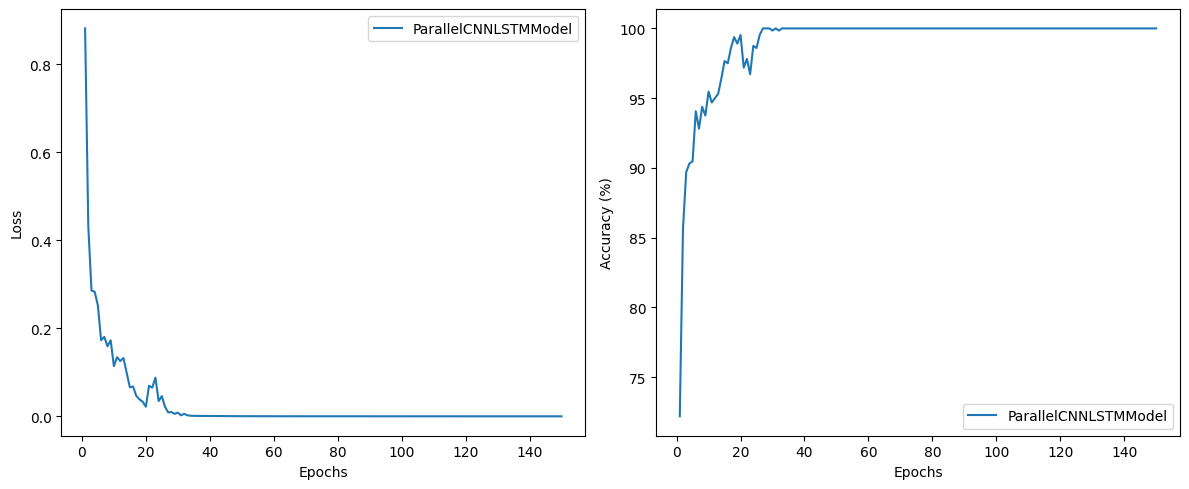

In [ ]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

def train(models: List, train_loader: DataLoader, epochs: int):
    criterion = nn.CrossEntropyLoss()
    loss_history = {model.__class__.__name__: [] for model in models}
    accuracy_history = {model.__class__.__name__: [] for model in models}

    for model in models:
        print("Training model: ", model.__class__.__name__)
        model.train()
        optimizer = Adam(model.parameters(), lr=0.001)
        for epoch in range(epochs):
            total_loss = 0.0
            correct_predictions = 0
            total_samples = 0

            for i, (x, y) in enumerate(train_loader):
                x = x.to(device)
                y = y.squeeze().to(device)  # Remove the extra dimension from the target tensor
                optimizer.zero_grad()
                y_pred = model(x)
                loss = criterion(y_pred, y)
                loss.backward()
                optimizer.step()

                # Compute accuracy
                _, predicted_labels = torch.max(y_pred, 1)
                correct_predictions += (predicted_labels == y).sum().item()
                total_samples += y.size(0)

                total_loss += loss.item()
                if (i + 1) % 10 == 0:
                    avg_loss = total_loss / 10
                    accuracy = correct_predictions / total_samples * 100
                    print(f'Epoch [{epoch + 1}/{epochs}], Step [{i + 1}/{len(train_loader)}], '
                          f'Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
                    total_loss = 0.0
                    correct_predictions = 0
                    total_samples = 0

            # Store loss and accuracy values for plotting
            loss_history[model.__class__.__name__].append(avg_loss)
            accuracy_history[model.__class__.__name__].append(accuracy)

        print("Training completed for model: ", model.__class__.__name__)

    # Plot loss and accuracy for each model
    plt.figure(figsize=(12, 5))
    for model in models:
        plt.subplot(1, 2, 1)  # Loss plot
        plt.plot(range(1, epochs + 1), loss_history[model.__class__.__name__], label=model.__class__.__name__)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)  # Accuracy plot
        plt.plot(range(1, epochs + 1), accuracy_history[model.__class__.__name__], label=model.__class__.__name__)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.legend()

    plt.tight_layout()
    plt.show()

# train
models = [cnn_lstm_parallel]
num_epochs = 150
train(models, train_loader, epochs=num_epochs)


In [ ]:
#

In [ ]:
models = [cnn_lstm, cnn_lstm_parallel]

Testing model:  CNN_LSTM
Test Accuracy: 85.14%
Testing model:  ParallelCNNLSTMModel
Test Accuracy: 91.11%


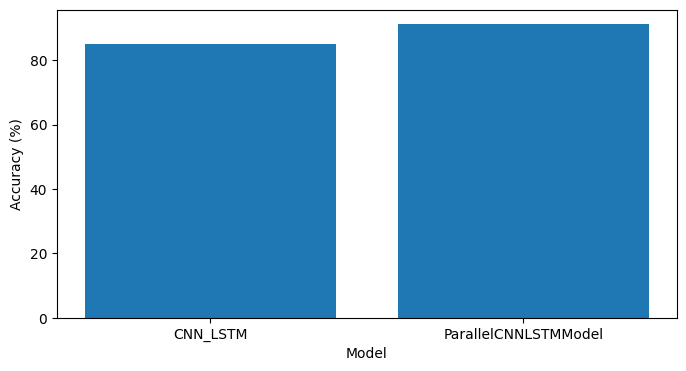

In [ ]:
def test(models: List, test_loader: DataLoader):
    accuracy_history = {model.__class__.__name__: [] for model in models}

    for model in models:
        print("Testing model: ", model.__class__.__name__)
        model.eval()  # Set the model to evaluation mode
        correct_predictions = 0
        total_samples = 0

        with torch.no_grad():  # Disable gradient computation during inference
            for x, y in test_loader:
                x = x.to(device)
                y = y.squeeze().to(device)  # Remove the extra dimension from the target tensor
                y_pred = model(x)
                _, predicted_labels = torch.max(y_pred, 1)
                correct_predictions += (predicted_labels == y).sum().item()
                total_samples += y.size(0)

        accuracy = correct_predictions / total_samples * 100
        print("Test Accuracy: {:.2f}%".format(accuracy))
        accuracy_history[model.__class__.__name__].append(accuracy)

    # Plot accuracy for each model
    plt.figure(figsize=(8, 4))
    models_names = [model.__class__.__name__ for model in models]
    x_points = np.arange(len(models_names))
    plt.bar(x_points, [accuracy_history[model_name][0] for model_name in models_names])
    plt.xlabel('Model')
    plt.ylabel('Accuracy (%)')
    plt.xticks(x_points, models_names)
    plt.show()

# Test the models
test(models, test_loader)



In [ ]:
import pickle
model_filename = 'cnn_lstm_scatter.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(cnn_lstm, file)

import pickle
model_filename = 'cnn_lstm_parallel_scatter.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(cnn_lstm_parallel, file)